#### Some useful links
1. https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102
2. https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

In [2]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Wall time: 0 ns


In [94]:
wine = pd.read_csv("winequality-white.csv",sep = ';')
print("Wine Quality dataset has {} rows and {} columns".format(wine.shape[0],wine.shape[1]))
wine.head()
# it has 10 classes and it's a multiclass classification problem

Wine Quality dataset has 4898 rows and 12 columns


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
wine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [16]:
wine.info() # there is object type values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Distribution of Classes

In [32]:
plt.style.use("fivethirtyeight")
wine["quality"].value_counts().plot(kind = "bar")
# inbalanced dataset

:Bars   [index]   (quality)

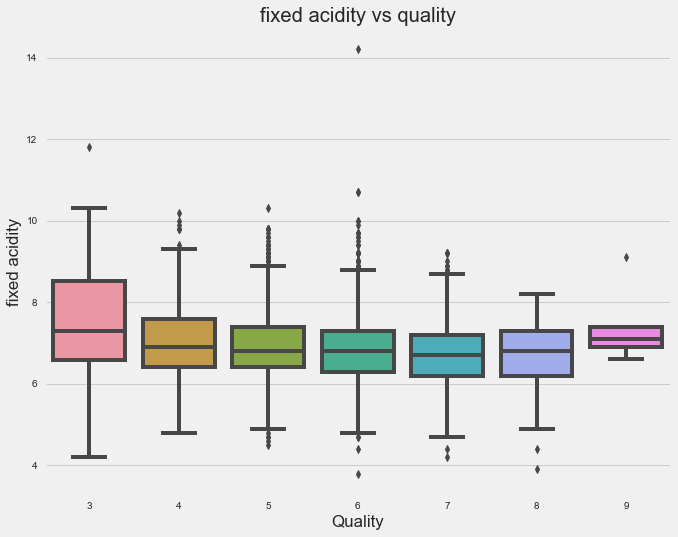

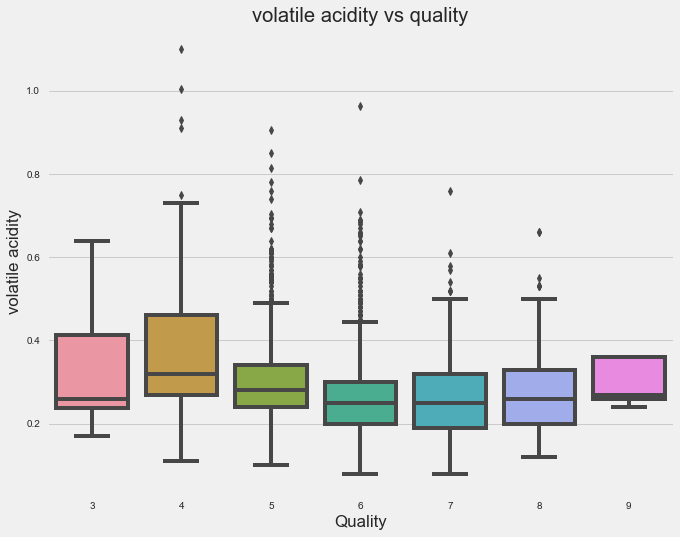

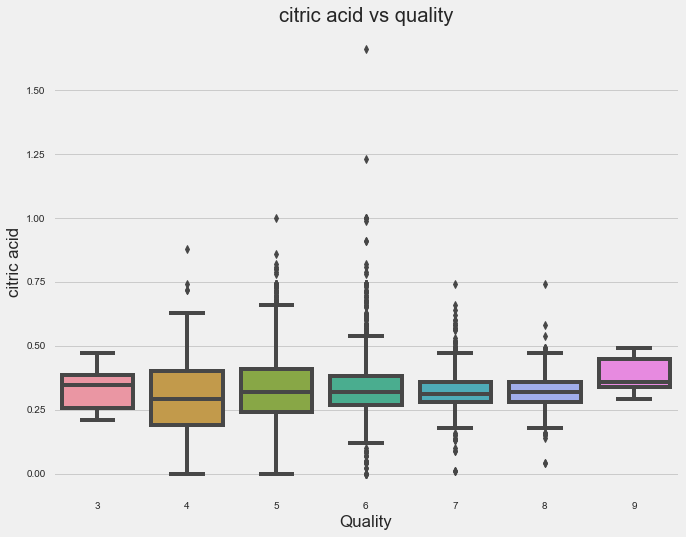

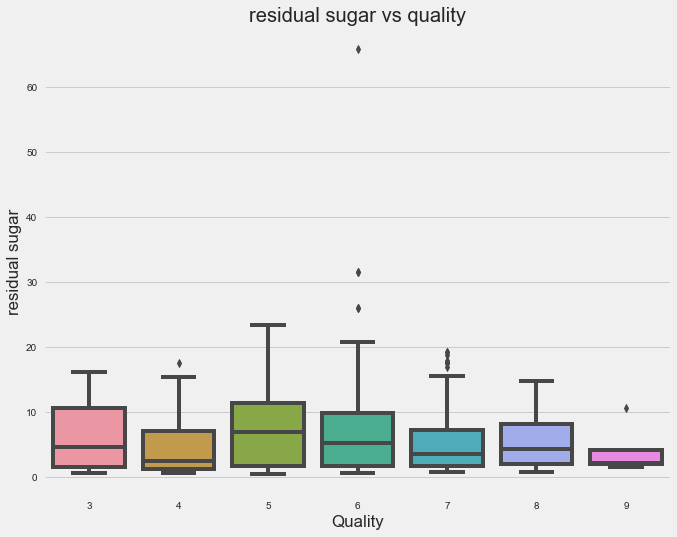

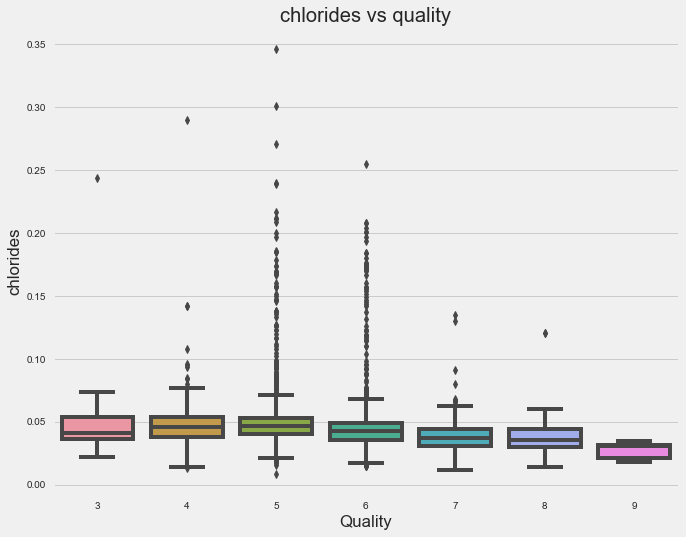

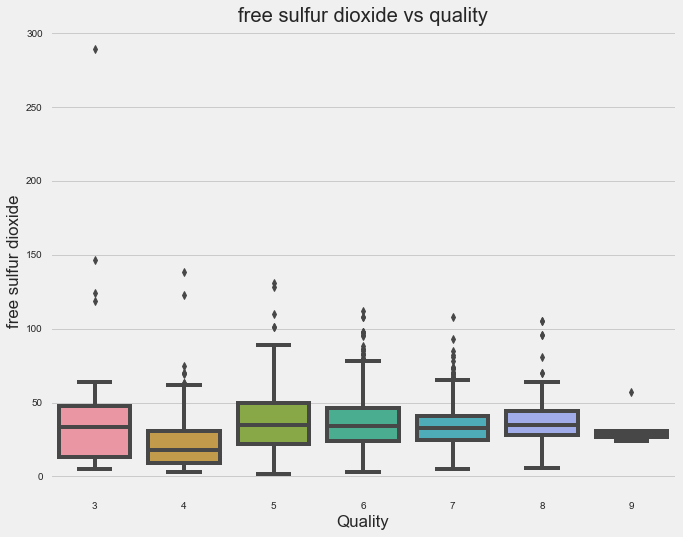

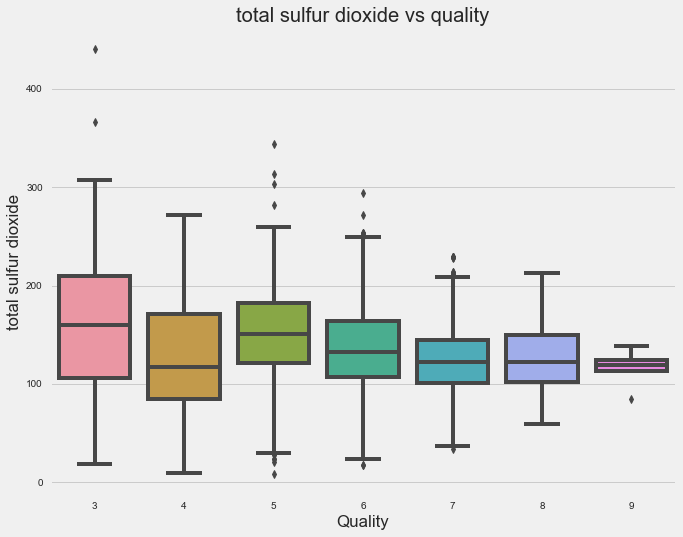

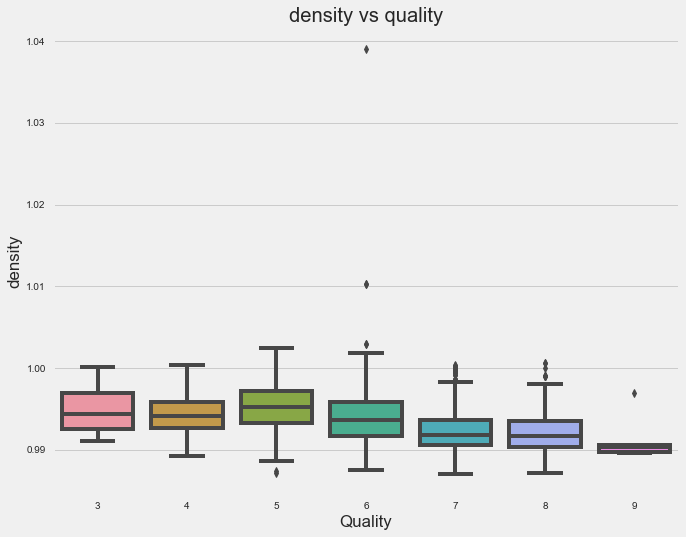

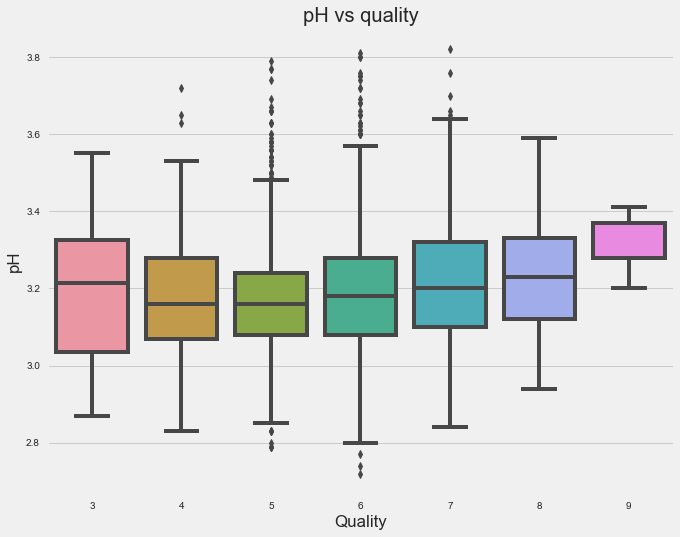

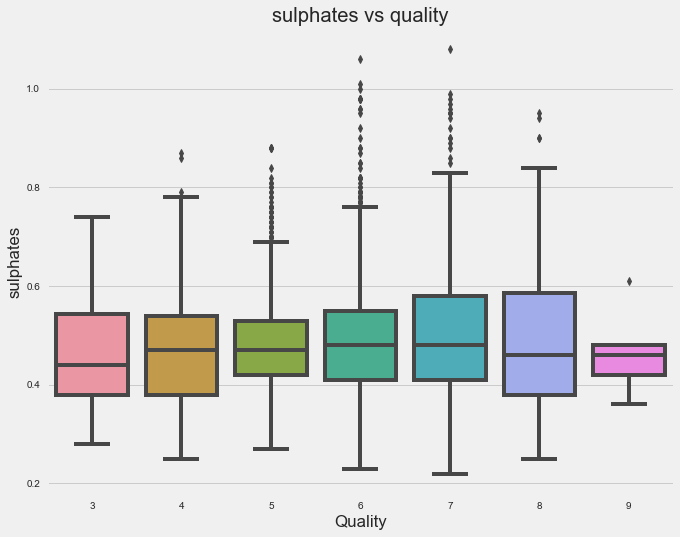

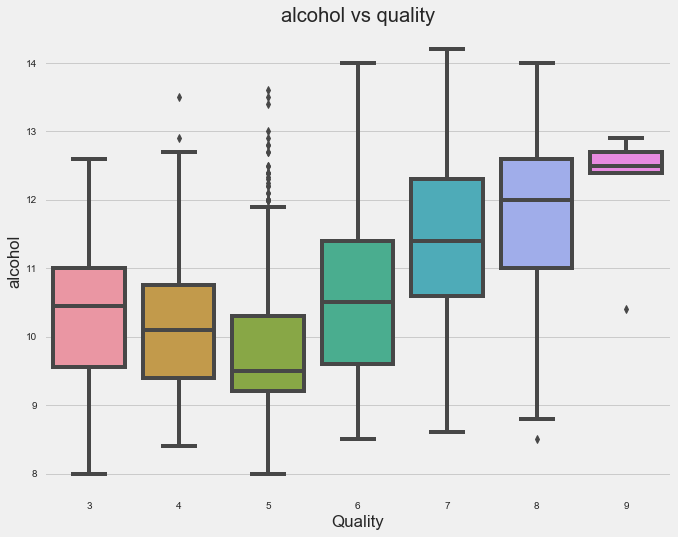

In [111]:
columns = wine.columns[:-1]
for col in columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(y = col,x = "quality",data = wine)
    plt.title(col + " vs quality")
    plt.xlabel("Quality")
    plt.ylabel(col)
    plt.show()

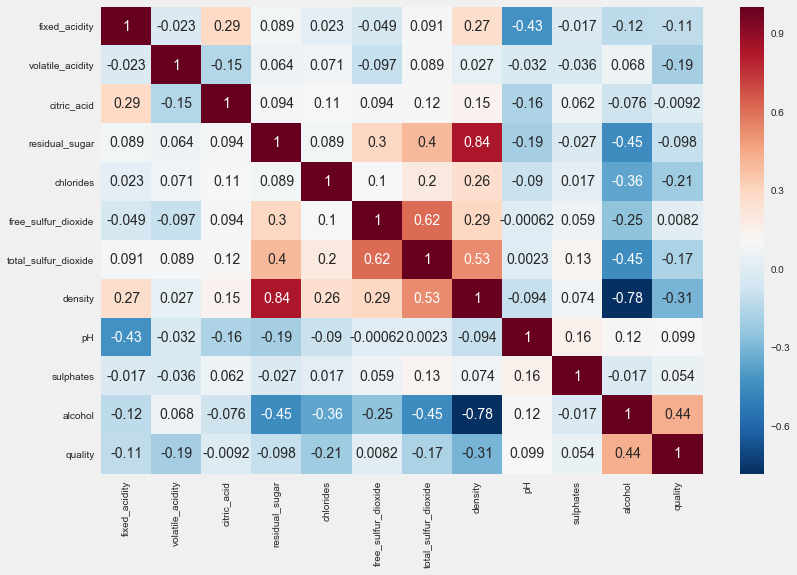

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.corr(),annot = True,cmap = "RdBu_r")
plt.show()

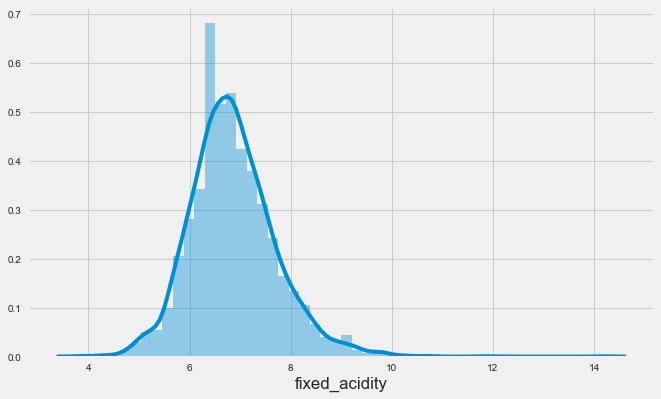

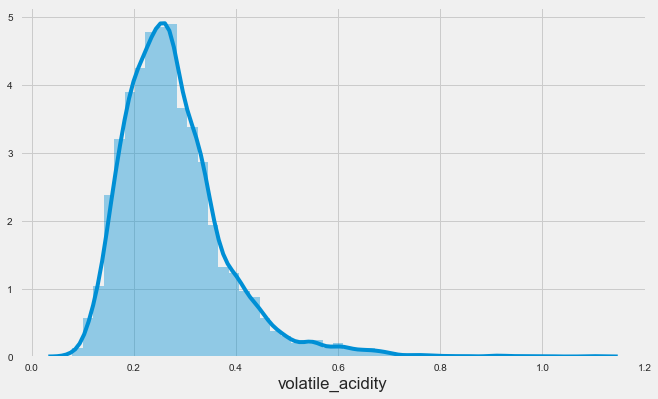

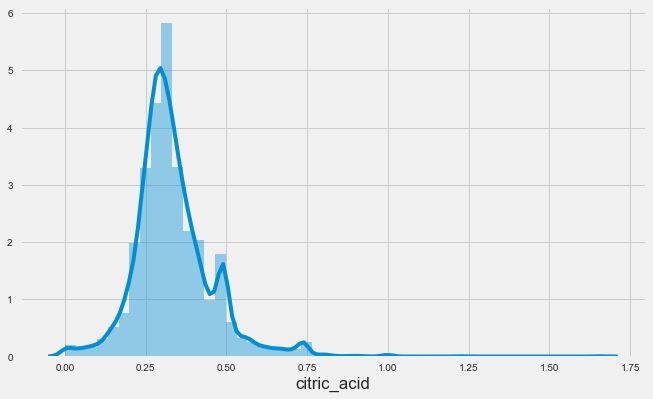

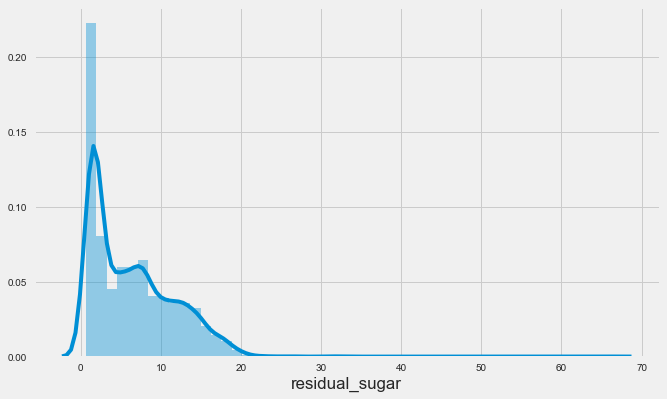

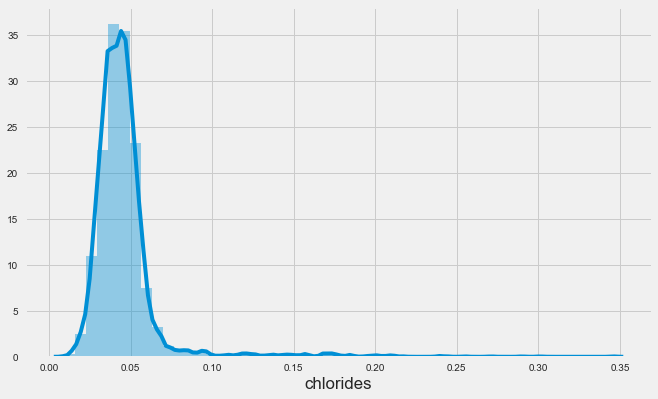

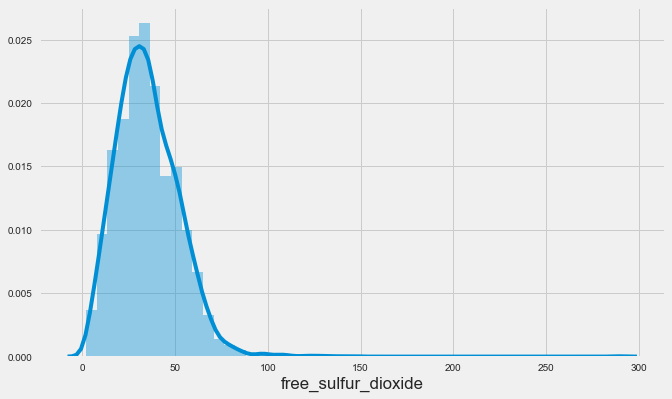

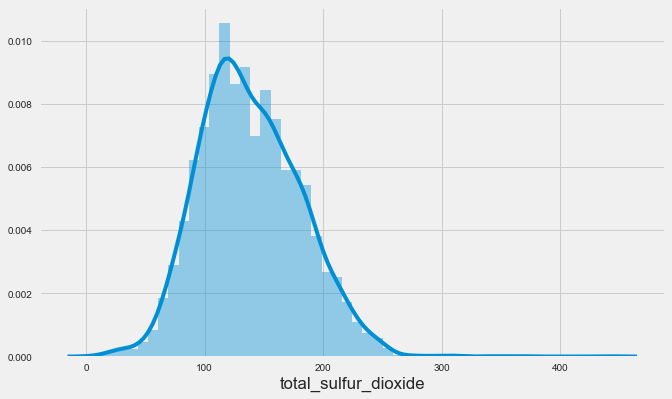

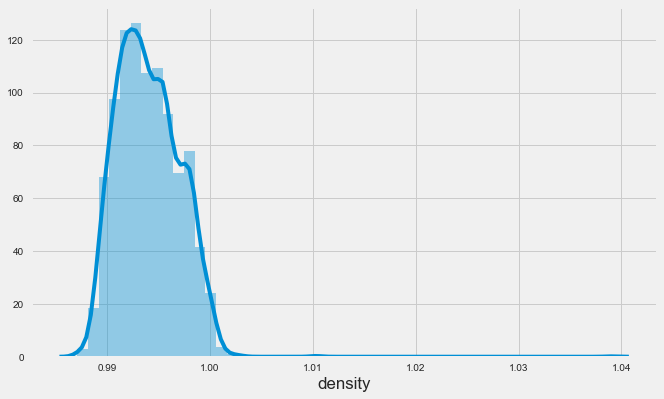

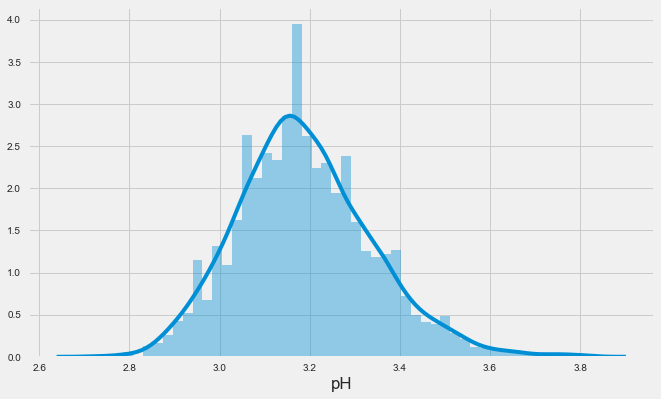

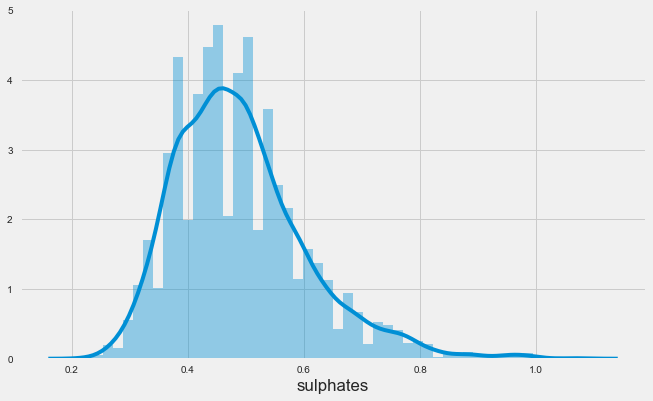

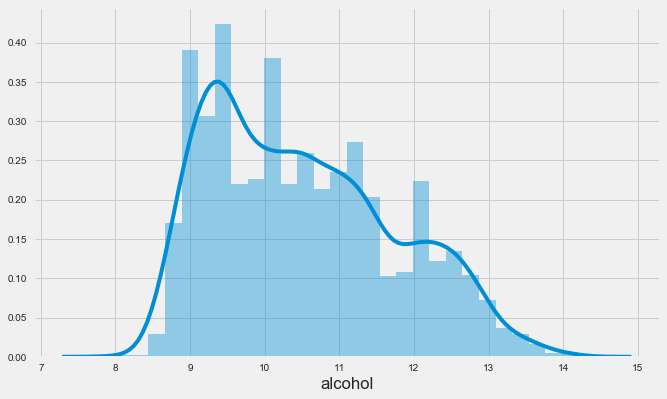

In [56]:
for col in columns:
    plt.figure(figsize=(10,6))
    sns.distplot(wine[col])

### Train Test Split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(wine.drop(["quality"],axis=1),wine["quality"],test_size = 0.2)
print("Shape of train data ",X_train.shape)
print("Shape of test data ",X_test.shape)

Shape of train data  (3918, 11)
Shape of test data  (980, 11)


### Min-Max Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

In [62]:
X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)

### Model 

In [104]:
from sklearn.metrics import *
lg = LogisticRegression(C = 1)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
#y_pred_proba = lg.predict_proba(X_test)
print("Accuracy of the model on test data ",accuracy_score(y_test,y_pred))

Accuracy of the model on test data  0.5010204081632653


In [109]:
from sklearn.model_selection import GridSearchCV
param = {"C":[0.0001,0.001,0.01,0.1]}
model = LogisticRegression(n_jobs=-1)
clf = GridSearchCV(model,param_grid=param,cv=3,return_train_score=True)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

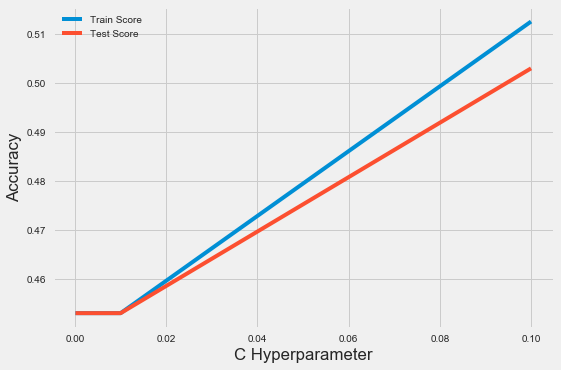

In [110]:
sns.lineplot(x = clf.cv_results_["param_C"],y = clf.cv_results_["mean_train_score"],label = "Train Score")
sns.lineplot(x = clf.cv_results_["param_C"],y = clf.cv_results_["mean_test_score"],label = "Test Score")
plt.legend()
plt.xlabel("C Hyperparameter")
plt.ylabel("Accuracy")
plt.show()